# Import Libraries

In [ ]:
# Import the required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# Hide warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Set rows and cols option for pandas
pd.set_option("display.max_rows", 200)
pd.set_option('display.max_columns', 500)

# Load data / check its structure / metadata

In [ ]:
# Read the csv files
air = pd.read_excel('AirQualityUCI.xlsx',na_values=[-200])
air.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [ ]:
# Identifying the shape of leads data frame
air.shape

(9357, 15)

In [ ]:
air.tail()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9352,2005-04-04,10:00:00,3.1,1314.25,-200,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250,0.756824
9353,2005-04-04,11:00:00,2.4,1162.50,-200,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725,0.711864
9354,2005-04-04,12:00:00,2.4,1142.00,-200,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350,0.640649
9355,2005-04-04,13:00:00,2.1,1002.50,-200,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550,0.513866
9356,2005-04-04,14:00:00,2.2,1070.75,-200,11.932060,1047.25,265.2,654.00,167.7,1128.50,816.00,28.500,13.125,0.502804


In [ ]:
# Check info of air dataset
# We will set verbose True to print the full summary
air.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         7674 non-null   float64       
 3   PT08.S1(CO)    8991 non-null   float64       
 4   NMHC(GT)       9357 non-null   int64         
 5   C6H6(GT)       8991 non-null   float64       
 6   PT08.S2(NMHC)  8991 non-null   float64       
 7   NOx(GT)        7718 non-null   float64       
 8   PT08.S3(NOx)   8991 non-null   float64       
 9   NO2(GT)        7715 non-null   float64       
 10  PT08.S4(NO2)   8991 non-null   float64       
 11  PT08.S5(O3)    8991 non-null   float64       
 12  T              8991 non-null   float64       
 13  RH             8991 non-null   float64       
 14  AH             8991 non-null   float64       
dtypes: datetime64[ns](1),

In [ ]:
# Describe numberical columns
air.describe()

,Date,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357,7674.000000,8991.000000,9357.000000,8991.000000,8991.000000,7718.000000,8991.000000,7715.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000
mean,2004-09-21 04:30:05.193972480,2.152750,1099.707856,-159.090093,10.082993,939.029205,246.881252,835.370973,113.075515,1456.143486,1022.780725,18.316054,49.232360,1.025530
min,2004-03-10 00:00:00,0.100000,647.250000,-200.000000,0.149048,383.250000,2.000000,322.000000,2.000000,551.000000,221.000000,-1.900000,9.175000,0.184679
25%,2004-06-16 00:00:00,1.100000,936.750000,-200.000000,4.436942,734.375000,98.000000,657.875000,78.000000,1226.625000,731.375000,11.787500,35.812500,0.736769
50%,2004-09-21 00:00:00,1.800000,1063.000000,-200.000000,8.239851,909.000000,179.800000,805.500000,109.000000,1462.750000,963.250000,17.750000,49.550000,0.995395
75%,2004-12-28 00:00:00,2.900000,1231.250000,-200.000000,13.988478,1116.250000,326.000000,969.250000,142.000000,1673.500000,1273.375000,24.400000,62.500001,1.313701
max,2005-04-04 00:00:00,11.900000,2039.750000,1189.000000,63.741476,2214.000000,1479.000000,2682.750000,339.700000,2775.000000,2522.750000,44.600000,88.725000,2.231036
std,NaN,1.453252,217.084571,139.789093,7.449640,266.829000,212.971224,256.815106,48.359250,346.204540,398.480897,8.832888,17.316389,0.403813


# Handle missing values and remove unnecessary features

In [ ]:
# Unhandled null values while loading dataset

air['NMHC(GT)'] = air['NMHC(GT)'].replace(-200, None)

In [ ]:
#Split hour from time into new column
air['Time'] = air['Time'].astype(str)
air['Hour']=air['Time'].apply(lambda x: int(x.split(':')[0]))
air.drop(['Time'], inplace=True, axis=1)
air.head()

,Date,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Hour
0,2004-03-10,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754,18
1,2004-03-10,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487,19
2,2004-03-10,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239,20
3,2004-03-10,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713,21
4,2004-03-10,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794,22


In [ ]:
# Extract month frm date
air['Month'] = pd.to_datetime(air.Date).dt.month
air['year'] = pd.to_datetime(air.Date).dt.year
air['Date'] = pd.to_datetime(air.Date).dt.date

air.drop(['Date','year'], inplace=True, axis=1)
air.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Hour,Month
0,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754,18,3
1,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487,19,3
2,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239,20,3
3,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713,21,3
4,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794,22,3


In [ ]:
# As Missing values are tagged with -200 value.

# Count missing values in each column
missing_value_counts = air.isnull().sum()/len(air.index) * 100
percentage_of_null_values = missing_value_counts.sort_values(ascending=False)

# Print the percenta
print(percentage_of_null_values)

NMHC(GT)         90.231912
CO(GT)           17.986534
NO2(GT)          17.548360
NOx(GT)          17.516298
PT08.S1(CO)       3.911510
C6H6(GT)          3.911510
PT08.S2(NMHC)     3.911510
PT08.S3(NOx)      3.911510
PT08.S4(NO2)      3.911510
PT08.S5(O3)       3.911510
T                 3.911510
RH                3.911510
AH                3.911510
Hour              0.000000
Month             0.000000
dtype: float64


In [ ]:
# Get all columns with percentage of missing values greater than 40
# Print total number of columns with missing values greater than 40

null_greater_than_40 =  percentage_of_null_values[percentage_of_null_values > 40]
print(null_greater_than_40)
print('='*50)
print('Total count of columns - ', len(null_greater_than_40))

# null_greater_than_40.index.tolist() will give us all the columns names with missing value greater than 40
air.drop(null_greater_than_40.index.tolist(), axis=1, inplace=True)
air.shape

NMHC(GT)    90.231912
dtype: float64
Total count of columns -  1


(9357, 14)

In [ ]:
missing_values = air.isnull().sum()/len(air.index) * 100
missing_values = missing_values.sort_values(ascending=False)
missing_values[missing_values > 0]

# Before we proceed with our analysis, let handle the missing values for below columns

CO(GT)           17.986534
NO2(GT)          17.548360
NOx(GT)          17.516298
PT08.S1(CO)       3.911510
C6H6(GT)          3.911510
PT08.S2(NMHC)     3.911510
PT08.S3(NOx)      3.911510
PT08.S4(NO2)      3.911510
PT08.S5(O3)       3.911510
T                 3.911510
RH                3.911510
AH                3.911510
dtype: float64

In [ ]:
# Fill missing by mean

air['CO(GT)']=air['CO(GT)'].fillna(air.groupby(['Month','Hour'])['CO(GT)'].transform('mean'))
air['NOx(GT)']=air['NOx(GT)'].fillna(air.groupby(['Month','Hour'])['NOx(GT)'].transform('mean'))
air['NO2(GT)']=air['NO2(GT)'].fillna(air.groupby(['Month','Hour'])['NO2(GT)'].transform('mean'))

In [ ]:
missing_values = air.isnull().sum()/len(air.index) * 100
missing_values = missing_values.sort_values(ascending=False)
missing_values[missing_values > 0]

# Before we proceed with our analysis, let handle the missing values for below columns

PT08.S1(CO)      3.911510
C6H6(GT)         3.911510
PT08.S2(NMHC)    3.911510
PT08.S3(NOx)     3.911510
PT08.S4(NO2)     3.911510
PT08.S5(O3)      3.911510
T                3.911510
RH               3.911510
AH               3.911510
NOx(GT)          2.928289
NO2(GT)          2.928289
CO(GT)           0.331303
dtype: float64

In [ ]:
# Fill missing by mean - Hour

air['CO(GT)']=air['CO(GT)'].fillna(air.groupby(['Hour'])['CO(GT)'].transform('mean'))
air['NOx(GT)']=air['NOx(GT)'].fillna(air.groupby(['Hour'])['NOx(GT)'].transform('mean'))
air['NO2(GT)']=air['NO2(GT)'].fillna(air.groupby(['Hour'])['NO2(GT)'].transform('mean'))

In [ ]:
missing_values = air.isnull().sum()/len(air.index) * 100
missing_values = missing_values.sort_values(ascending=False)
missing_values[missing_values > 0]

# Before we proceed with our analysis, let handle the missing values for below columns

PT08.S1(CO)      3.91151
C6H6(GT)         3.91151
PT08.S2(NMHC)    3.91151
PT08.S3(NOx)     3.91151
PT08.S4(NO2)     3.91151
PT08.S5(O3)      3.91151
T                3.91151
RH               3.91151
AH               3.91151
dtype: float64

In [ ]:
# Dropping all rows where target column is null

air = air.dropna(subset=['RH'])

missing_values = air.isnull().sum()/len(air.index) * 100
missing_values = missing_values.sort_values(ascending=False)
missing_values[missing_values > 0]

# Before we proceed with our analysis, let handle the missing values for below columns

Series([], dtype: float64)

# Handle Outlier for Numeric fields

In [ ]:
# Describe

air.describe()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Hour,Month
count,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000
mean,2.090362,1099.707856,10.082993,939.029205,236.012627,835.370973,108.241469,1456.143486,1022.780725,18.316054,49.232360,1.025530,11.479591,6.327772
std,1.378556,217.084571,7.449640,266.829000,197.244972,256.815106,45.486649,346.204540,398.480897,8.832888,17.316389,0.403813,6.913320,3.407854
min,0.100000,647.250000,0.149048,383.250000,2.000000,322.000000,2.000000,551.000000,221.000000,-1.900000,9.175000,0.184679,0.000000,1.000000
25%,1.066667,936.750000,4.436942,734.375000,100.250000,657.875000,73.429454,1226.625000,731.375000,11.787500,35.812500,0.736769,5.000000,3.000000
50%,1.800000,1063.000000,8.239851,909.000000,170.641667,805.500000,104.000000,1462.750000,963.250000,17.750000,49.550000,0.995395,11.000000,6.000000
75%,2.800000,1231.250000,13.988478,1116.250000,319.800000,969.250000,134.000000,1673.500000,1273.375000,24.400000,62.500001,1.313701,17.000000,9.000000
max,11.900000,2039.750000,63.741476,2214.000000,1479.000000,2682.750000,332.600000,2775.000000,2522.750000,44.600000,88.725000,2.231036,23.000000,12.000000


<Axes: >

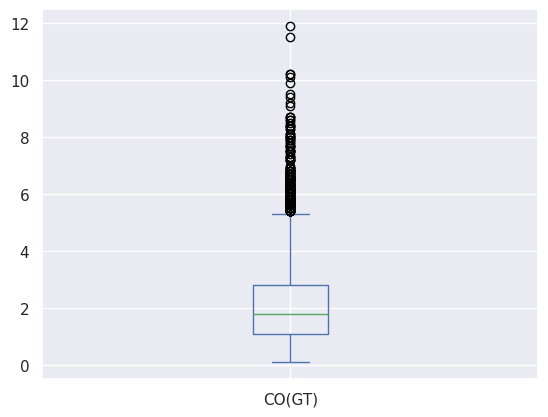

In [ ]:
# Let check outliers for CO(GT)

air["CO(GT)"].plot.box()

<Axes: >

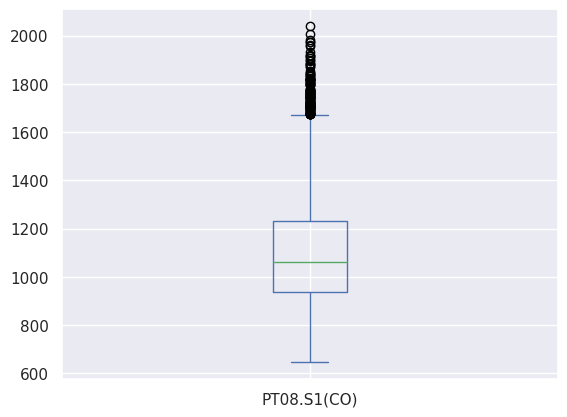

In [ ]:
# Let check outliers for PT08.S1(CO)

air["PT08.S1(CO)"].plot.box()

<Axes: >

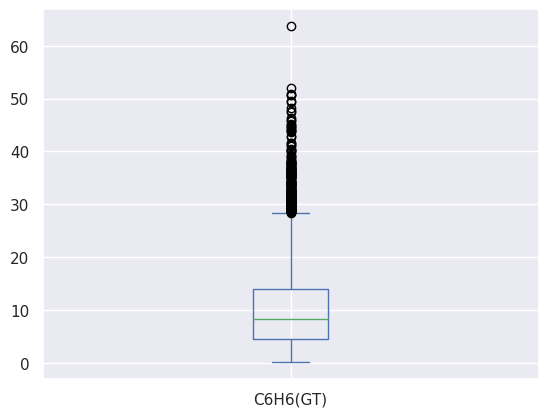

In [ ]:
# Let check outliers for C6H6(GT)

air["C6H6(GT)"].plot.box()

# Convert Target variable to

In [ ]:
# Describe

air.describe()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Hour,Month
count,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000
mean,2.090362,1099.707856,10.082993,939.029205,236.012627,835.370973,108.241469,1456.143486,1022.780725,18.316054,49.232360,1.025530,11.479591,6.327772
std,1.378556,217.084571,7.449640,266.829000,197.244972,256.815106,45.486649,346.204540,398.480897,8.832888,17.316389,0.403813,6.913320,3.407854
min,0.100000,647.250000,0.149048,383.250000,2.000000,322.000000,2.000000,551.000000,221.000000,-1.900000,9.175000,0.184679,0.000000,1.000000
25%,1.066667,936.750000,4.436942,734.375000,100.250000,657.875000,73.429454,1226.625000,731.375000,11.787500,35.812500,0.736769,5.000000,3.000000
50%,1.800000,1063.000000,8.239851,909.000000,170.641667,805.500000,104.000000,1462.750000,963.250000,17.750000,49.550000,0.995395,11.000000,6.000000
75%,2.800000,1231.250000,13.988478,1116.250000,319.800000,969.250000,134.000000,1673.500000,1273.375000,24.400000,62.500001,1.313701,17.000000,9.000000
max,11.900000,2039.750000,63.741476,2214.000000,1479.000000,2682.750000,332.600000,2775.000000,2522.750000,44.600000,88.725000,2.231036,23.000000,12.000000


<Axes: >

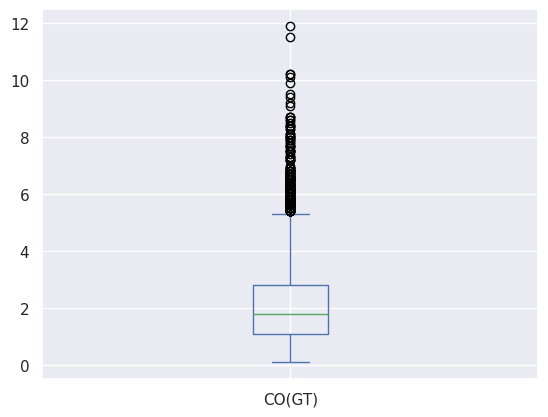

In [ ]:
# Let check outliers for CO(GT)

air["CO(GT)"].plot.box()

<Axes: >

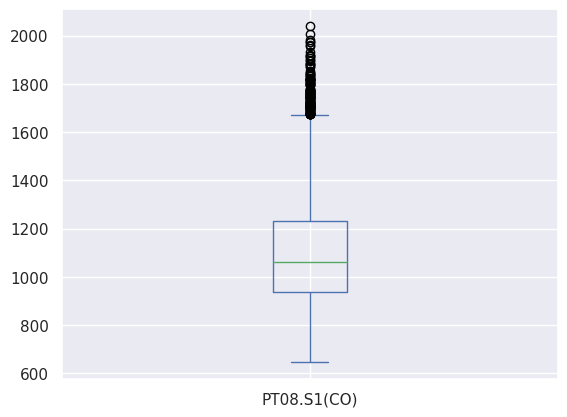

In [ ]:
# Let check outliers for PT08.S1(CO)

air["PT08.S1(CO)"].plot.box()

<Axes: >

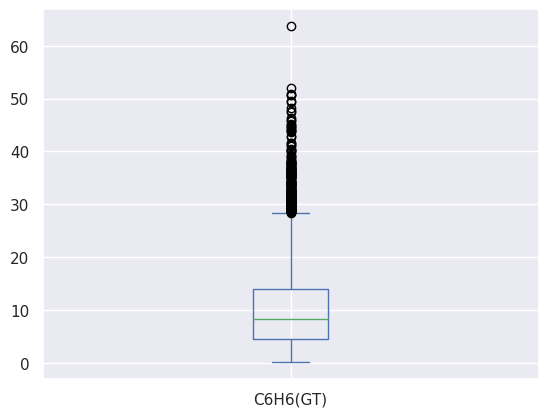

In [ ]:
# Let check outliers for C6H6(GT)

air["C6H6(GT)"].plot.box()

# Univariate Analysis

In [ ]:
sns.set_style('whitegrid')
sns.set_context('talk')

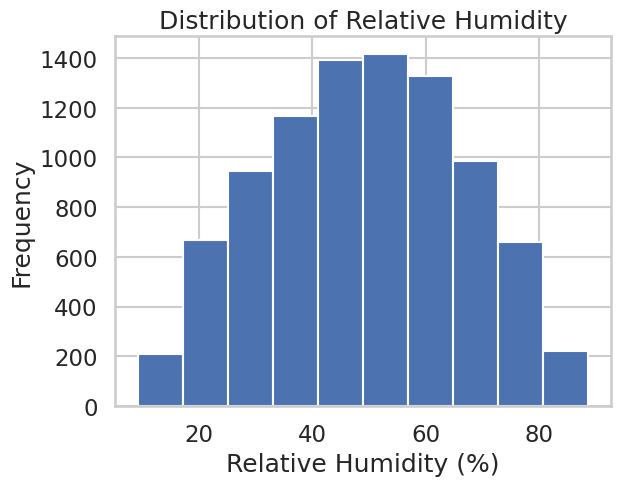

In [ ]:
# Create a histogram to visualize the distribution of relative humidity

plt.hist(air['RH'])
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Frequency')
plt.title('Distribution of Relative Humidity')
plt.show()

# We see that the O/P variable is normally distributed

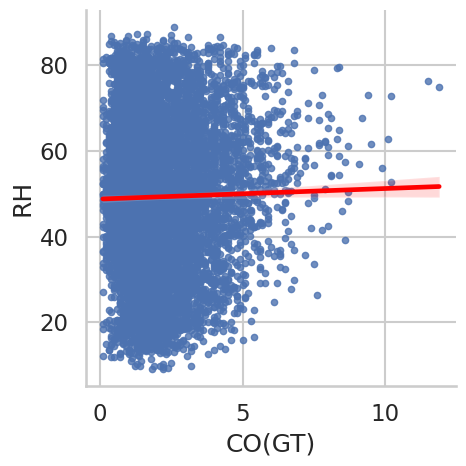

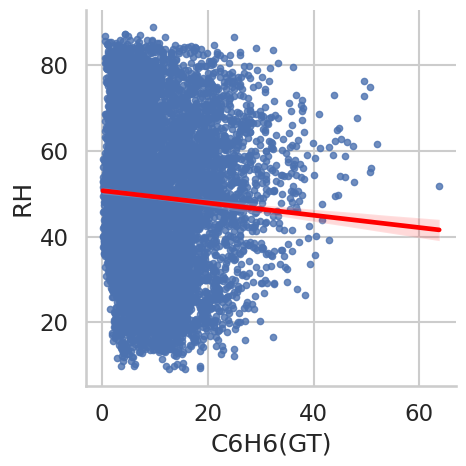

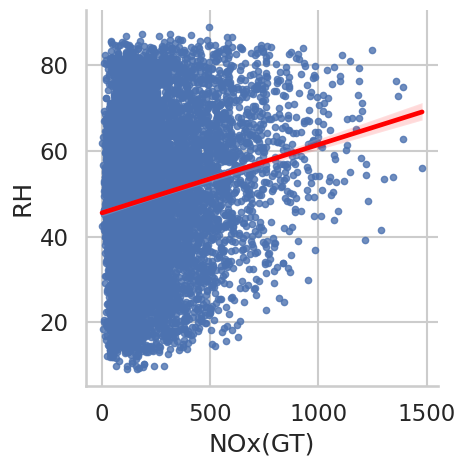

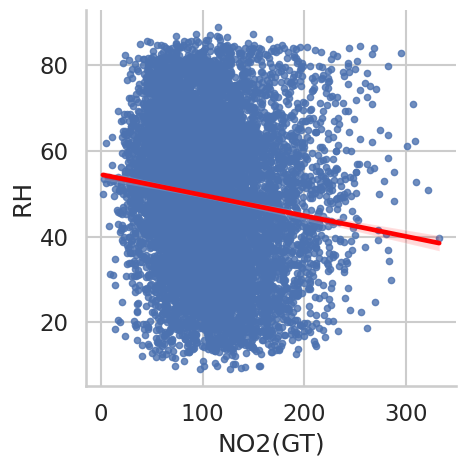

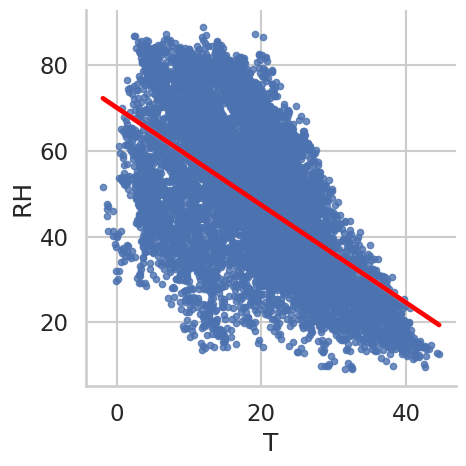

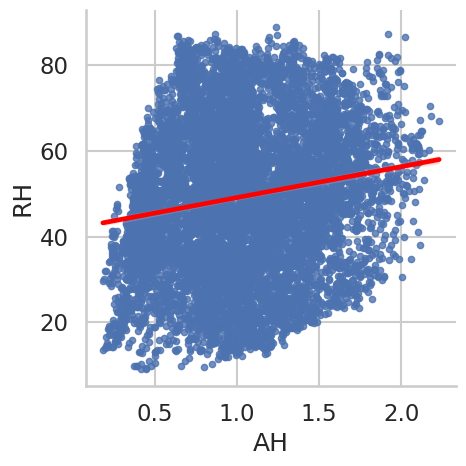

In [ ]:
#plot all X-features against output variable RH
col_= ['CO(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)', 'T', 'AH']
for i in col_:
    sns.lmplot(x=i,y='RH',data=air,markers='.',line_kws={'color': 'red'})
plt.show()


# Bivariate Analysis

In [ ]:
# Allow for customizing number of bins and labels (optional)
def create_bins(df, column_name, num_bins=5, labels=None, new_column_name=None):
  """
  Creates bins for a column in a pandas DataFrame.

  Args:
      df (pandas.DataFrame): The DataFrame containing the column.
      column_name (str): The name of the column to create bins for.
      num_bins (int, optional): The desired number of bins. Defaults to 5.
      labels (list, optional): A list of labels for the bins. Defaults to None.

  Returns:
      pandas.DataFrame: The DataFrame with a new column containing the bin labels.
  """
  if labels is None:
    labels = [f"Bin {i}" for i in range(1, num_bins + 1)]

  df[new_column_name] = pd.cut(df[column_name], bins=num_bins, labels=labels)
  return df

In [ ]:
# Choose the column to create bins for
column_name = 'PT08.S1(CO)'
new_column_name = "Cat" + column_name

# Define bin edges (can be customized based on your needs)
bins = [600, 1000, 1400, 1800, 2200]

# Call the function with desired number of bins and labels (optional)
air = create_bins(air.copy(), column_name, num_bins=4, labels=["Low", "Medium", "High", "Very High"], new_column_name=new_column_name)

# Print the modified DataFrame
air.head()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Hour,Month,CatPT08.S1(CO)
0,2.6,1360.00,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754,18,3,High
1,2.0,1292.25,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487,19,3,Medium
2,2.2,1402.00,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239,20,3,High
3,2.2,1375.50,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713,21,3,High
4,1.6,1272.25,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794,22,3,Medium


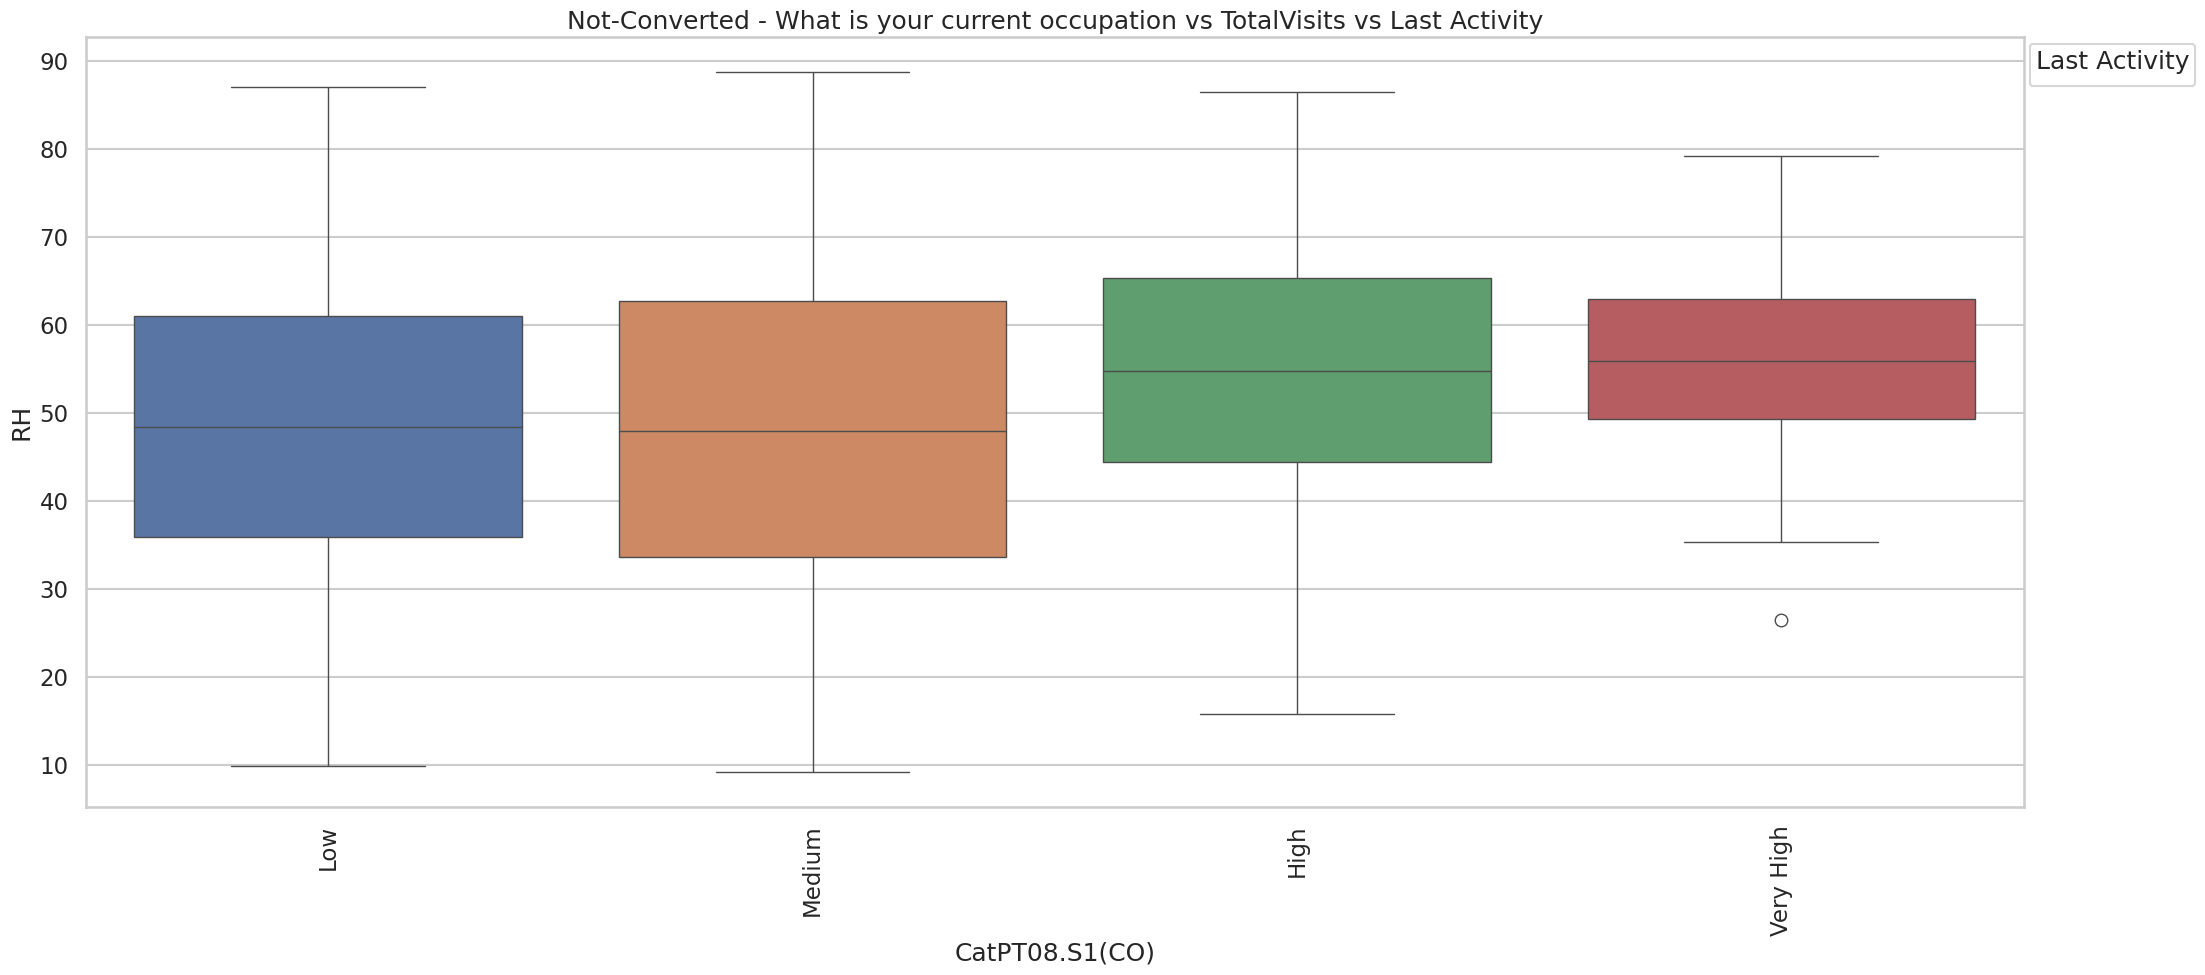

In [ ]:
# Box plotting for What is your current occupation vs TotalVisits vs Last Activity

plt.figure(figsize=(25,25))
plt.subplots_adjust(wspace=0.3, hspace=0.5)

plt.subplot(2,1,1)
sns.boxplot(data=air, x='CatPT08.S1(CO)',y='RH', hue ='CatPT08.S1(CO)',orient='v]')
plt.title('Not-Converted - What is your current occupation vs TotalVisits vs Last Activity')
plt.legend(title='Last Activity', bbox_to_anchor=(1, 1), loc='upper left', fontsize = 10)
plt.xticks(rotation=90)

plt.show()

# For leads that were not converted we see that house wife has no activity, working professional and others have lower total visits
# For leads that were converted we see house wife, businessman and others have opened emails and have higher total visits

In [ ]:
# Choose the column to create bins for
column_name = 'PT08.S2(NMHC)'
new_column_name = "Cat" + column_name

# Define bin edges (can be customized based on your needs)
bins = [300, 700, 1100, 1500, 1900, 2300]

# Call the function with desired number of bins and labels (optional)
air = create_bins(air.copy(), column_name, num_bins=5, labels=["Low", "Extendend Low", "Medium", "High", "Very High"], new_column_name=new_column_name)

# Print the modified DataFrame
air.head()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Hour,Month,CatPT08.S1(CO),CatPT08.S2(NMHC)
0,2.6,1360.00,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754,18,3,High,Extendend Low
1,2.0,1292.25,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487,19,3,Medium,Extendend Low
2,2.2,1402.00,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239,20,3,High,Extendend Low
3,2.2,1375.50,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713,21,3,High,Extendend Low
4,1.6,1272.25,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794,22,3,Medium,Extendend Low


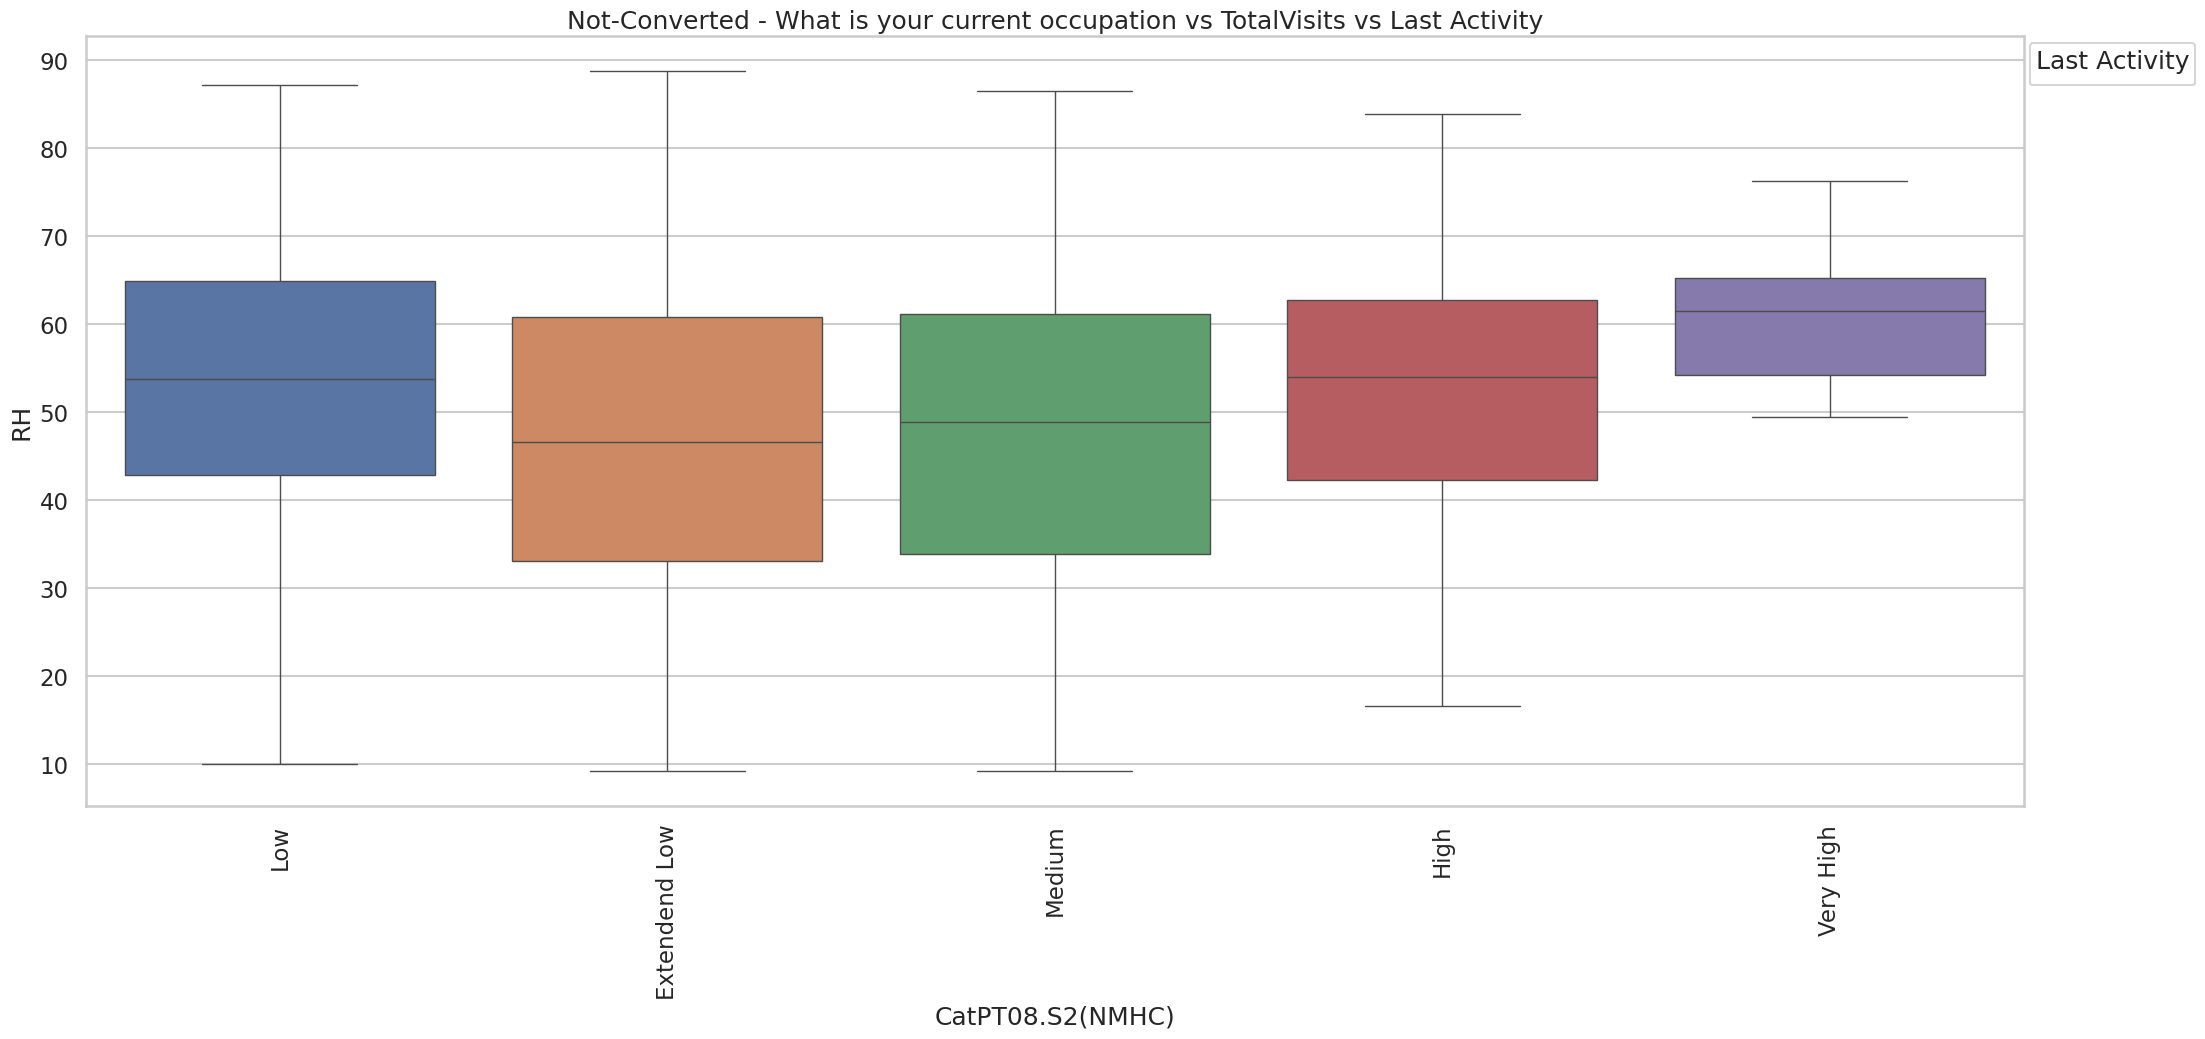

In [ ]:
# Box plotting for What is your current occupation vs TotalVisits vs Last Activity

plt.figure(figsize=(25,25))
plt.subplots_adjust(wspace=0.3, hspace=0.5)

plt.subplot(2,1,1)
sns.boxplot(data=air, x='CatPT08.S2(NMHC)',y='RH', hue ='CatPT08.S2(NMHC)',orient='v]')
plt.title('Not-Converted - What is your current occupation vs TotalVisits vs Last Activity')
plt.legend(title='Last Activity', bbox_to_anchor=(1, 1), loc='upper left', fontsize = 10)
plt.xticks(rotation=90)

plt.show()

# For leads that were not converted we see that house wife has no activity, working professional and others have lower total visits
# For leads that were converted we see house wife, businessman and others have opened emails and have higher total visits

In [ ]:
# Choose the column to create bins for
column_name = 'PT08.S3(NOx)'
new_column_name = "Cat" + column_name

# Define bin edges (can be customized based on your needs)
bins = [300, 800, 1300, 1800, 2300, 2800]

# Call the function with desired number of bins and labels (optional)
air = create_bins(air.copy(), column_name, num_bins=5, labels=["Low", "Extendend Low", "Medium", "High", "Very High"], new_column_name=new_column_name)

# Print the modified DataFrame
air.head()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Hour,Month,CatPT08.S1(CO),CatPT08.S2(NMHC),CatPT08.S3(NOx)
0,2.6,1360.00,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754,18,3,High,Extendend Low,Extendend Low
1,2.0,1292.25,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487,19,3,Medium,Extendend Low,Extendend Low
2,2.2,1402.00,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239,20,3,High,Extendend Low,Extendend Low
3,2.2,1375.50,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713,21,3,High,Extendend Low,Extendend Low
4,1.6,1272.25,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794,22,3,Medium,Extendend Low,Extendend Low


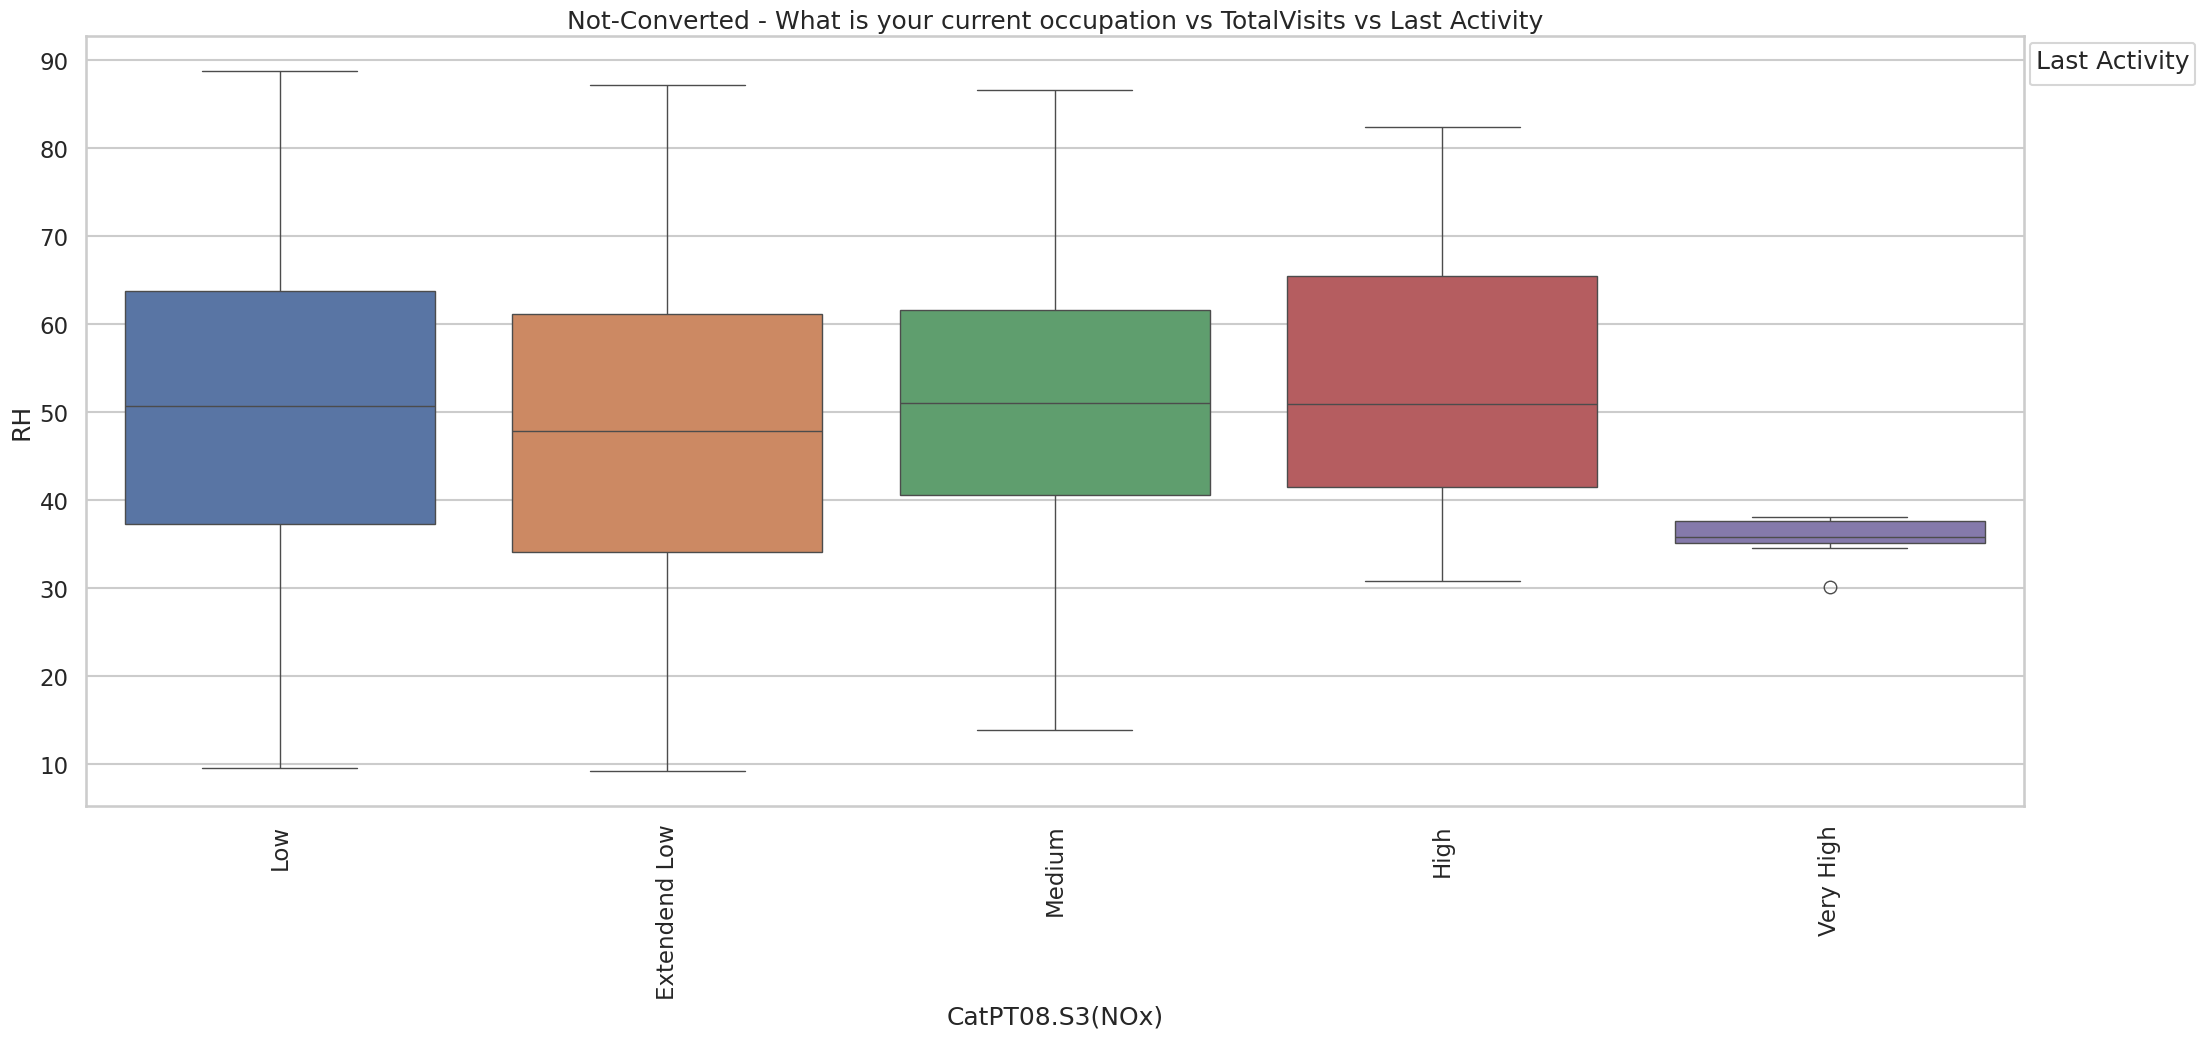

In [ ]:
# Box plotting for What is your current occupation vs TotalVisits vs Last Activity

plt.figure(figsize=(25,25))
plt.subplots_adjust(wspace=0.3, hspace=0.5)

plt.subplot(2,1,1)
sns.boxplot(data=air, x='CatPT08.S3(NOx)',y='RH', hue ='CatPT08.S3(NOx)',orient='v]')
plt.title('Not-Converted - What is your current occupation vs TotalVisits vs Last Activity')
plt.legend(title='Last Activity', bbox_to_anchor=(1, 1), loc='upper left', fontsize = 10)
plt.xticks(rotation=90)

plt.show()

# For leads that were not converted we see that house wife has no activity, working professional and others have lower total visits
# For leads that were converted we see house wife, businessman and others have opened emails and have higher total visits

In [ ]:
# Choose the column to create bins for
column_name = 'PT08.S4(NO2)'
new_column_name = "Cat" + column_name

# Define bin edges (can be customized based on your needs)
bins = [300, 800, 1300, 1800, 2300, 2800]

# Call the function with desired number of bins and labels (optional)
air = create_bins(air.copy(), column_name, num_bins=5, labels=["Low", "Extendend Low", "Medium", "High", "Very High"], new_column_name=new_column_name)

# Print the modified DataFrame
air.head()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Hour,Month,CatPT08.S1(CO),CatPT08.S2(NMHC),CatPT08.S3(NOx),CatPT08.S4(NO2)
0,2.6,1360.00,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754,18,3,High,Extendend Low,Extendend Low,Medium
1,2.0,1292.25,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487,19,3,Medium,Extendend Low,Extendend Low,Medium
2,2.2,1402.00,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239,20,3,High,Extendend Low,Extendend Low,Medium
3,2.2,1375.50,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713,21,3,High,Extendend Low,Extendend Low,Medium
4,1.6,1272.25,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794,22,3,Medium,Extendend Low,Extendend Low,Medium


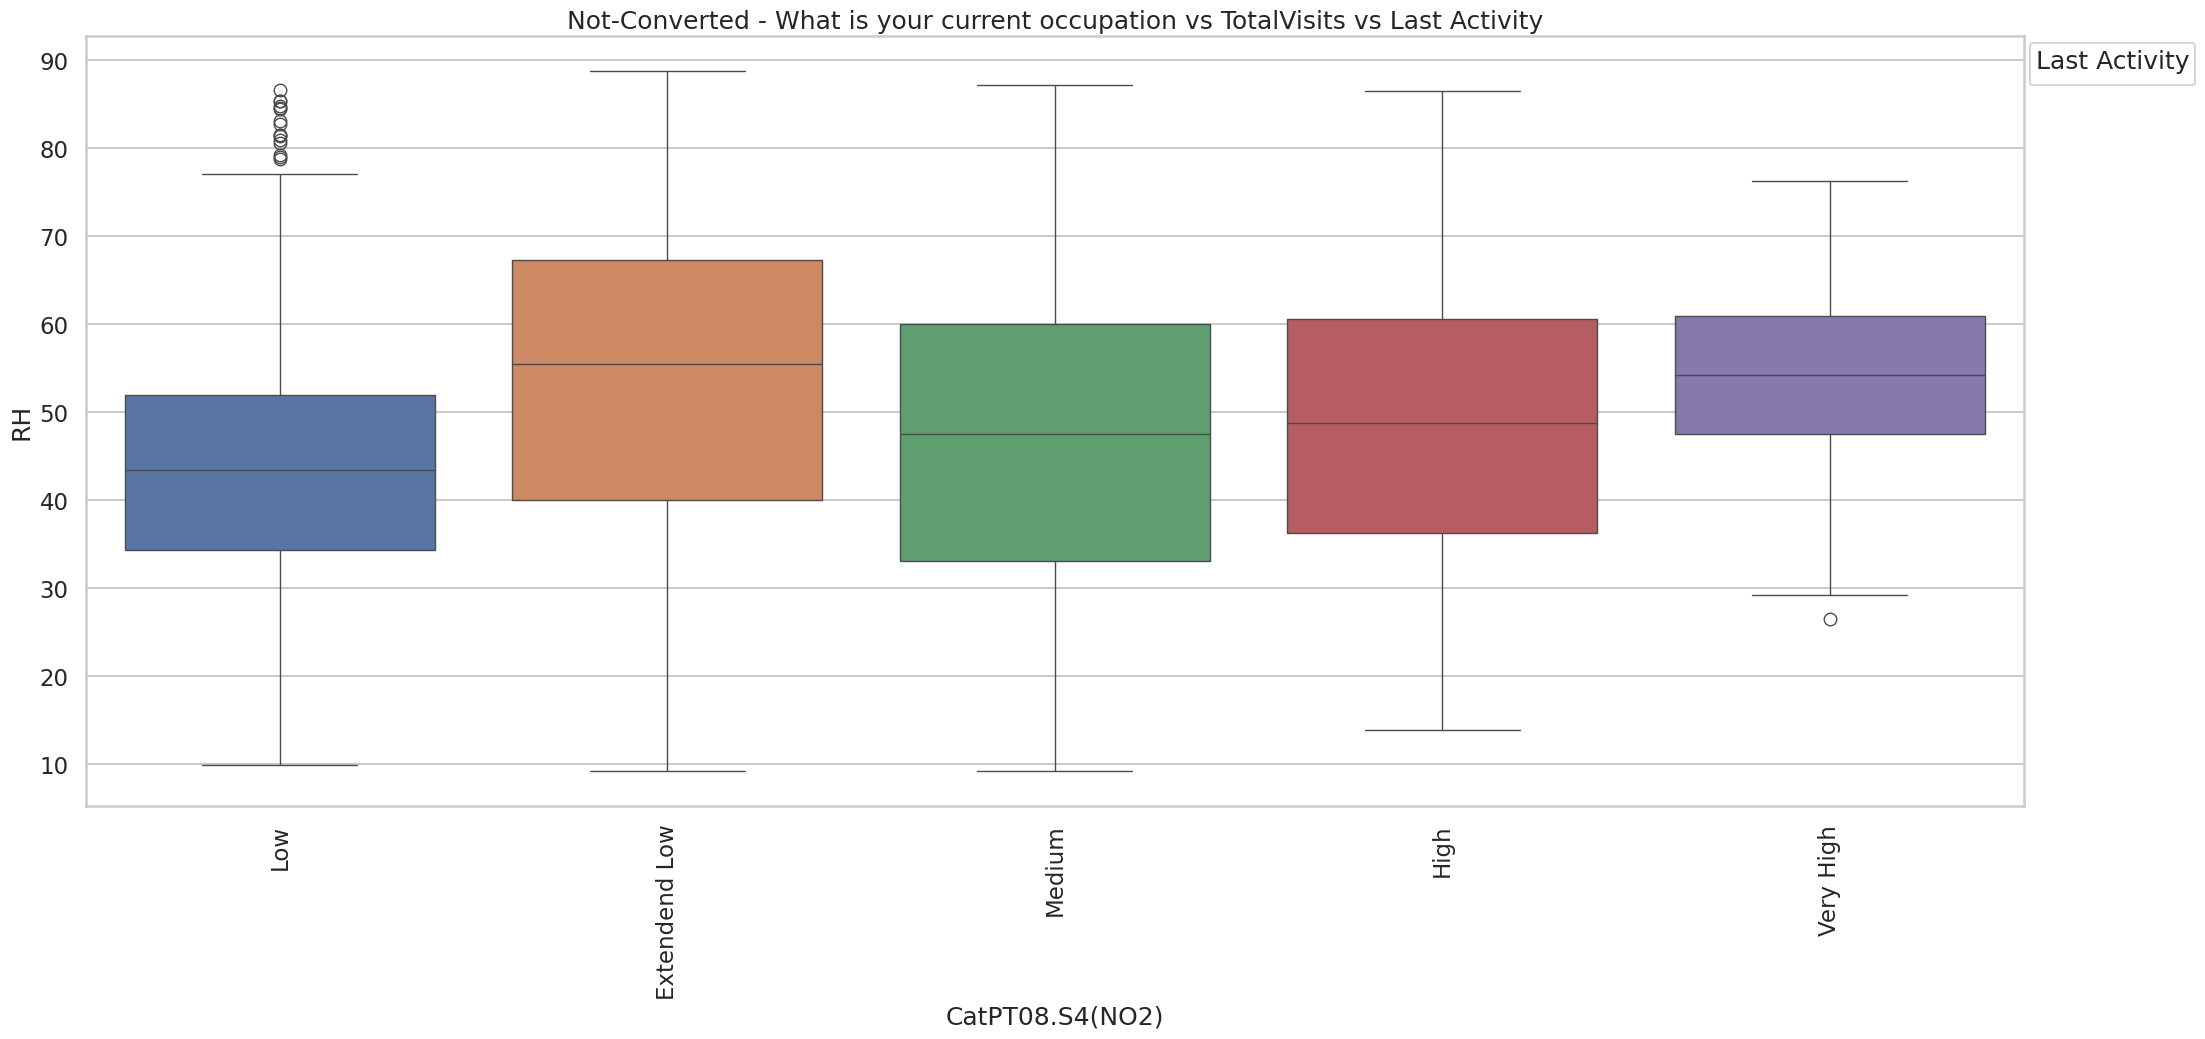

In [ ]:
# Box plotting for What is your current occupation vs TotalVisits vs Last Activity

plt.figure(figsize=(25,25))
plt.subplots_adjust(wspace=0.3, hspace=0.5)

plt.subplot(2,1,1)
sns.boxplot(data=air, x='CatPT08.S4(NO2)',y='RH', hue ='CatPT08.S4(NO2)',orient='v]')
plt.title('Not-Converted - What is your current occupation vs TotalVisits vs Last Activity')
plt.legend(title='Last Activity', bbox_to_anchor=(1, 1), loc='upper left', fontsize = 10)
plt.xticks(rotation=90)

plt.show()

# For leads that were not converted we see that house wife has no activity, working professional and others have lower total visits
# For leads that were converted we see house wife, businessman and others have opened emails and have higher total visits

In [ ]:
# Choose the column to create bins for
column_name = 'PT08.S5(O3)'
new_column_name = "Cat" + column_name

# Define bin edges (can be customized based on your needs)
bins = [300, 800, 1300, 1800, 2300, 2800]

# Call the function with desired number of bins and labels (optional)
air = create_bins(air.copy(), column_name, num_bins=5, labels=["Low", "Extendend Low", "Medium", "High", "Very High"], new_column_name=new_column_name)

# Print the modified DataFrame
air.head()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Hour,Month,CatPT08.S1(CO),CatPT08.S2(NMHC),CatPT08.S3(NOx),CatPT08.S4(NO2),CatPT08.S5(O3)
0,2.6,1360.00,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754,18,3,High,Extendend Low,Extendend Low,Medium,Medium
1,2.0,1292.25,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487,19,3,Medium,Extendend Low,Extendend Low,Medium,Extendend Low
2,2.2,1402.00,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239,20,3,High,Extendend Low,Extendend Low,Medium,Extendend Low
3,2.2,1375.50,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713,21,3,High,Extendend Low,Extendend Low,Medium,Medium
4,1.6,1272.25,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794,22,3,Medium,Extendend Low,Extendend Low,Medium,Extendend Low


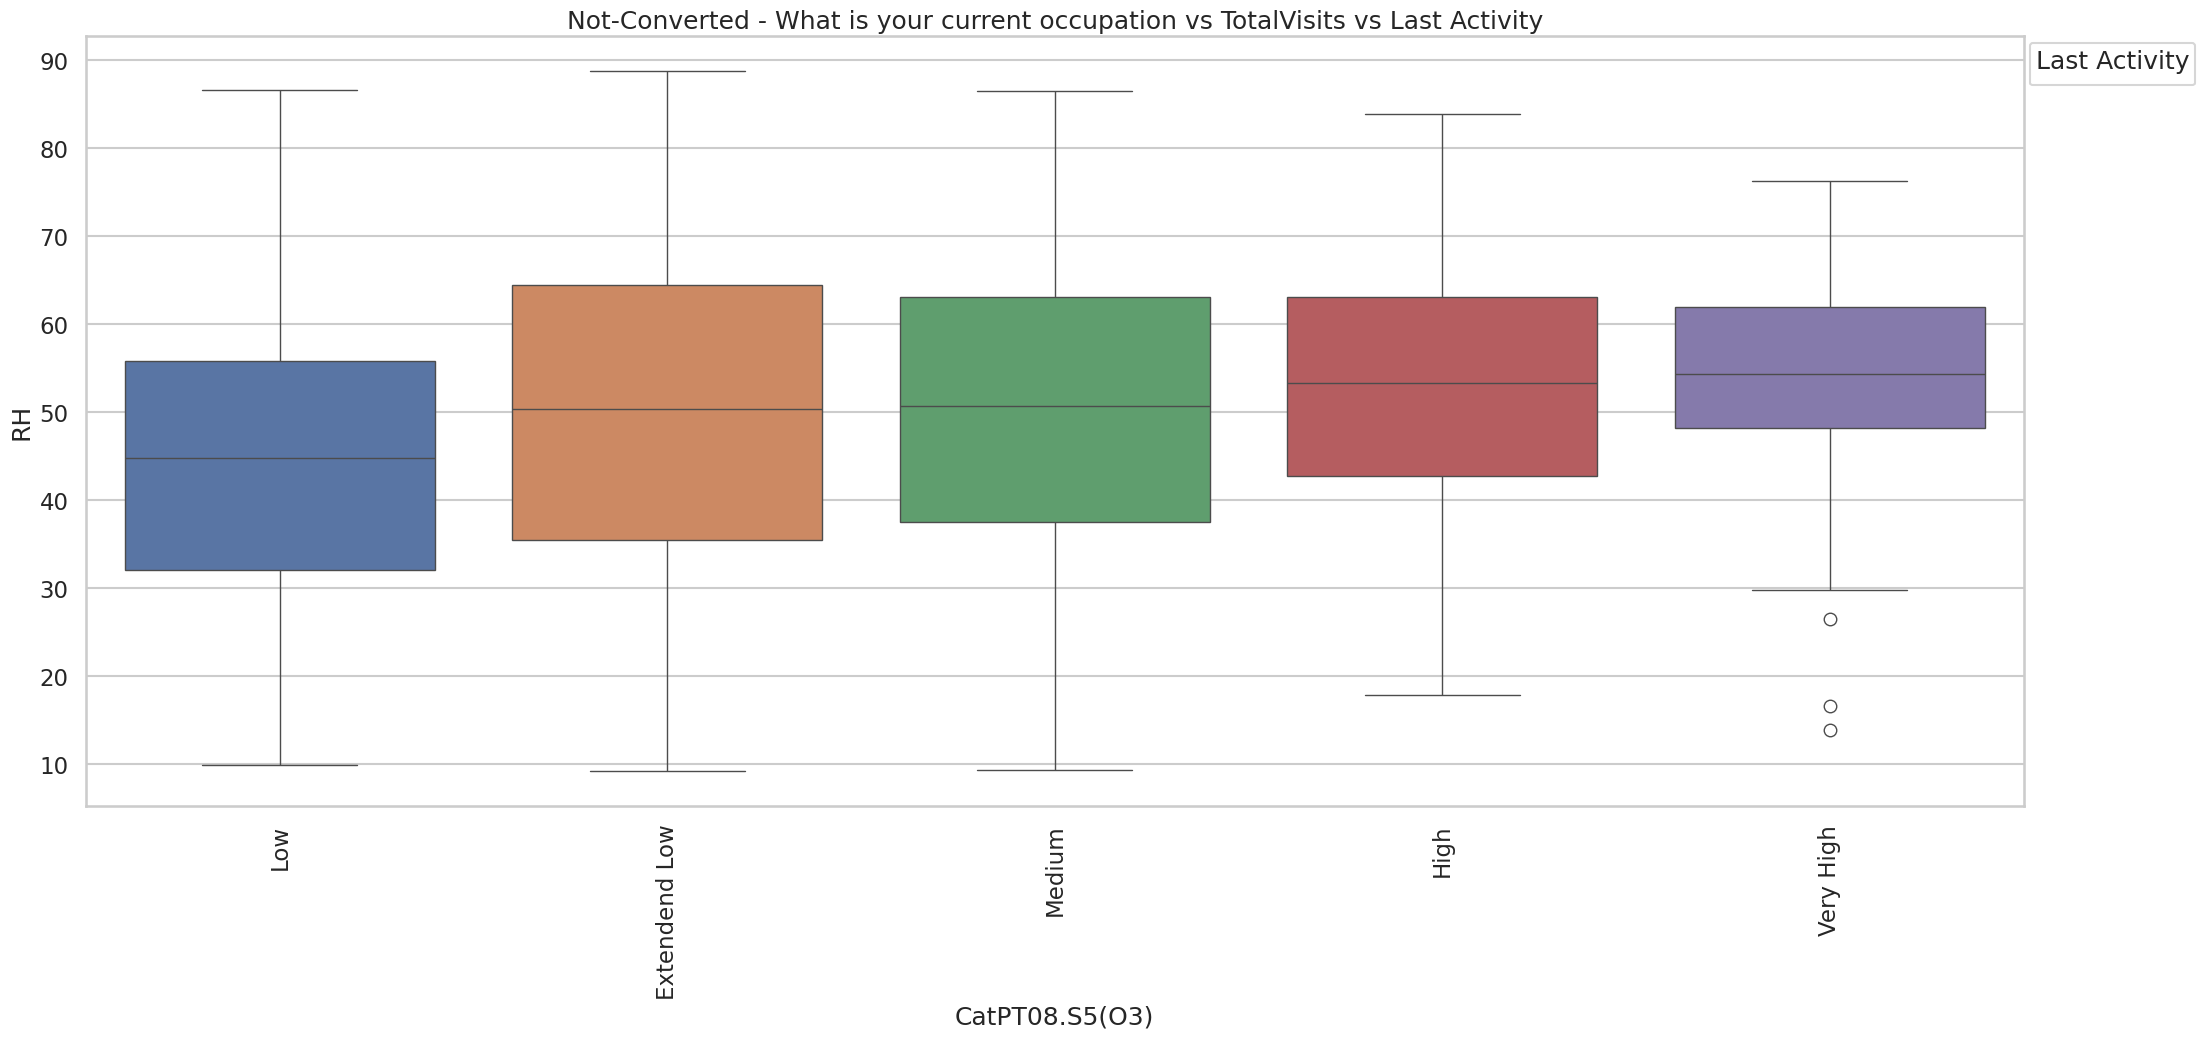

In [ ]:
# Box plotting for What is your current occupation vs TotalVisits vs Last Activity

plt.figure(figsize=(25,25))
plt.subplots_adjust(wspace=0.3, hspace=0.5)

plt.subplot(2,1,1)
sns.boxplot(data=air, x='CatPT08.S5(O3)',y='RH', hue ='CatPT08.S5(O3)',orient='v]')
plt.title('Not-Converted - What is your current occupation vs TotalVisits vs Last Activity')
plt.legend(title='Last Activity', bbox_to_anchor=(1, 1), loc='upper left', fontsize = 10)
plt.xticks(rotation=90)

plt.show()

# For leads that were not converted we see that house wife has no activity, working professional and others have lower total visits
# For leads that were converted we see house wife, businessman and others have opened emails and have higher total visits

# Drop categorical variables used for Analysis

In [ ]:
# drop columns after creating dummies for them
air.drop(['CatPT08.S1(CO)','CatPT08.S2(NMHC)','CatPT08.S3(NOx)','CatPT08.S4(NO2)','CatPT08.S5(O3)'], axis=1, inplace=True)

In [ ]:
air.head()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Hour,Month
0,2.6,1360.00,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754,18,3
1,2.0,1292.25,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487,19,3
2,2.2,1402.00,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239,20,3
3,2.2,1375.50,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713,21,3
4,1.6,1272.25,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794,22,3


# Split into train test

In [ ]:
# Putting feature variable to X
X = air.drop(['RH'], axis=1)
X.head()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,AH,Hour,Month
0,2.6,1360.00,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,0.757754,18,3
1,2.0,1292.25,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,0.725487,19,3
2,2.2,1402.00,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,0.750239,20,3
3,2.2,1375.50,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,0.786713,21,3
4,1.6,1272.25,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,0.788794,22,3


In [ ]:
# Putting target variable to y
y = air['RH']
y.head()

0    48.875001
1    47.700000
2    53.975000
3    60.000000
4    59.575001
Name: RH, dtype: float64

In [ ]:
scaler = StandardScaler()

X[X.columns] = scaler.fit_transform(X[X.columns])

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)


# Multivariate Analysis

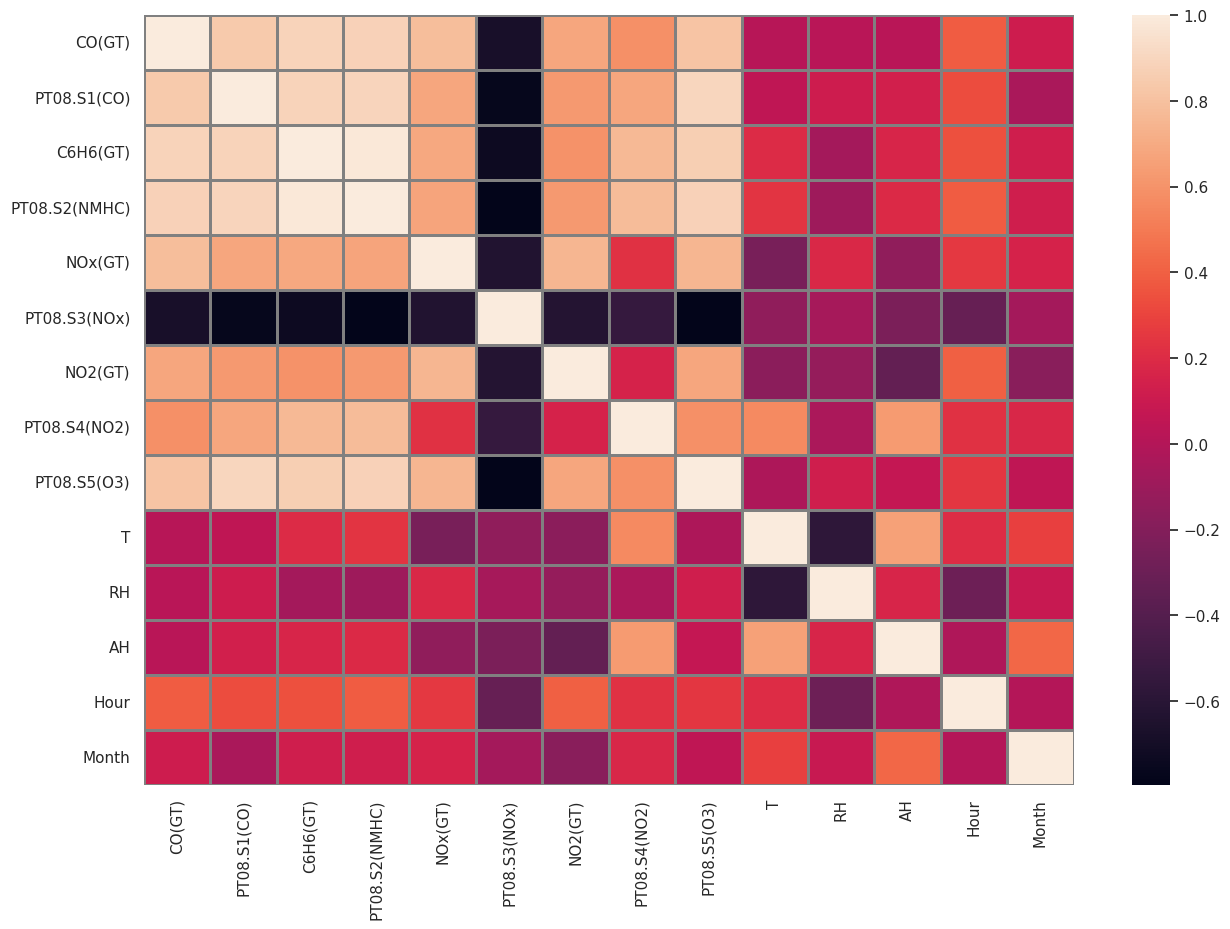

In [ ]:
# We see there are quite a number of feature with collinearity greater than 80 percent
# We will handel them using RFE during our model building stage

from copy import copy
corr = air.corr()

plt.figure(figsize=(15,10))
sns.set(font_scale=1)


sns.heatmap(corr,
    linewidths=1.0,
    linecolor="grey")

plt.show()

# Feature seclection using RFE

In [ ]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [ ]:
#USING RFE APPROACH FOR FEATURE SELECTION
# WE START WITH 15 VARS AND WILL USE MIXED APPROACH TO BUILD A MODEL

lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train

# Model building - Stats Model - Iteration 1

In [ ]:
#BUILDING MODEL USING STATSMODEL:

import statsmodels.api as sm
X_train_rfe = sm.add_constant(X_train_rfe)

In [ ]:
lm = sm.OLS(y_train,X_train_rfe).fit()

In [ ]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                     RH   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     3621.
Date:                Sun, 05 May 2024   Prob (F-statistic):               0.00
Time:                        15:36:12   Log-Likelihood:                -20171.
No. Observations:                6293   AIC:                         4.037e+04
Df Residuals:                    6279   BIC:                         4.046e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            49.2523      0.075    653.746

# Prediction

In [ ]:
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

#Predict values
y_train_cnt = lm.predict(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                     RH   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     3621.
Date:                Sun, 05 May 2024   Prob (F-statistic):               0.00
Time:                        15:36:12   Log-Likelihood:                -20171.
No. Observations:                6293   AIC:                         4.037e+04
Df Residuals:                    6279   BIC:                         4.046e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            49.2523      0.075    653.746

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#CALCULATING RESIDUALS

res=y_train - y_train_cnt

Text(0.5, 0, 'Errors')

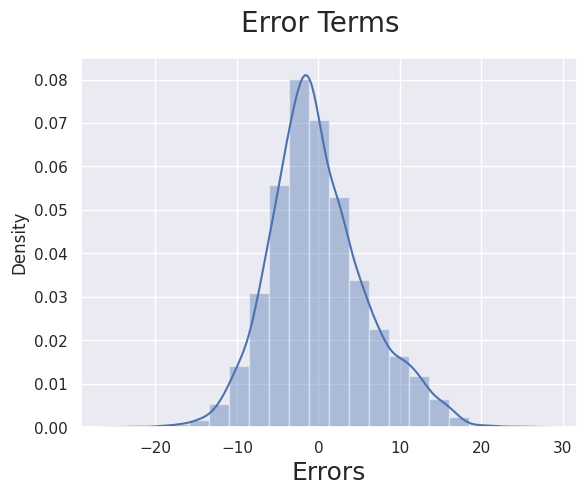

In [ ]:
#Checking ASSUMPTION OF NORMALITY:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [ ]:
#Making predictions on the chosen model
X_train_rfe=X_train_rfe.drop(['const'], axis=1)

X_test_new = X_test[X_train_rfe.columns]

# Adding a constant variable
X_test_new = sm.add_constant(X_test_new)

y_pred = lm.predict(X_test_new)

Text(0, 0.5, 'y_pred')

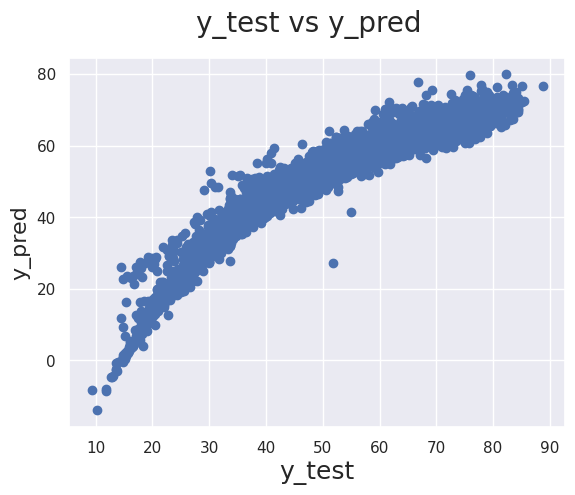

In [ ]:
#CHECKING PREDICTED V/s TEST DATA

fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

# Evaluation

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

5.822389912363919

In [ ]:
#Calculate the r square for test

r_squared = r2_score(y_test, y_pred)
r_squared

0.8844546021638866

In [ ]:
X_t=X_train_rfe.iloc[:,0].values

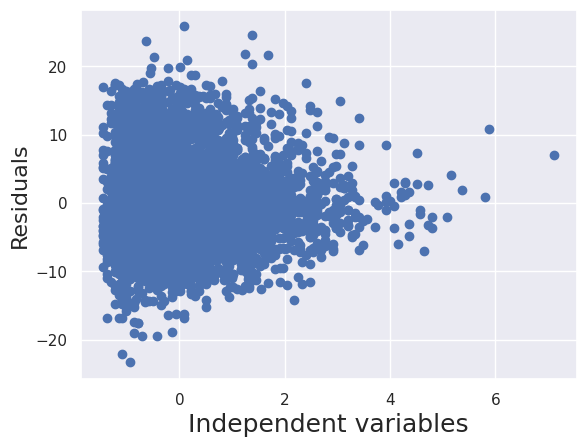

In [ ]:
#PLotting the residuals to see if a pattern exists
#Checking assumption of homoscedasticity and autocorrelation
plt.figure()
plt.scatter(X_t,res)
fig.suptitle('Independent vars vs res', fontsize=20)              # Plot heading
plt.xlabel('Independent variables', fontsize=18)                          # X-label
plt.ylabel('Residuals', fontsize=16)
plt.show()

In [ ]:
#Making predictions on the chosen model

X_test_new = X_test[X_train_rfe.columns]

# Adding a constant variable
X_test_new = sm.add_constant(X_test_new)

y_pred = lm.predict(X_test_new)

Text(0, 0.5, 'y_pred')

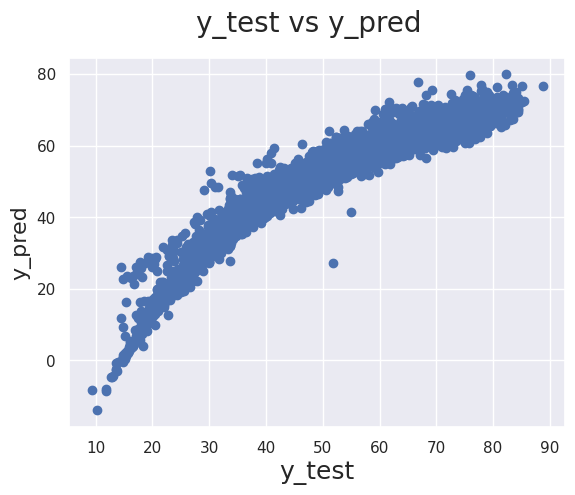

In [ ]:
#CHECKING PREDICTED V/s TEST DATA

fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label